In [1]:
# importing all necessary packages
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import requests

from bs4 import BeautifulSoup

In [2]:
# Creating blank pandas data frame with 'Year' & 'GDP-Growth-Rate(in %)' columns
columns = ['Year', 'GDP-Growth-Rate(in %)']
df = pd.DataFrame(columns=columns)

In [3]:
# Fetching Wikipedia page html for gathering GDP Growth rate data
wikipedia_page = requests.get("https://en.wikipedia.org/wiki/Economy_of_India").text

# View returned html text
# wikipedia_page

In [4]:
# Creating BeautifulSoup instance for returned wikipedia html page
soup = BeautifulSoup(wikipedia_page, 'lxml')

# View returned html in structured format
# print(soup.prettify())

In [5]:
# Scraping specific GDP grawth rate data table
gdp_table = soup.find('table',{'class':'wikitable sortable'})
# gdp_table

In [6]:
# Scrapping specific attributes from the table & arranging them in structured format in gdp_data_arr
gdp_data_arr = []
for row in gdp_table.select('tbody > tr')[1:]:
    gdp_data_arr.append({
            'Year':int(row.select_one('td:nth-child(1)').text.strip()), 
            'GDP-Growth-Rate(in %)':float(row.select_one('td:nth-child(5)').text.strip().encode('ascii', 'ignore').decode('utf-8').replace('%',''))
        })

In [7]:
# Appending gdp_data_arr to the blank dataframe 
df = df.append(gdp_data_arr,ignore_index=True)

# Removing data records before year 2009
df = df[df['Year']>2008]

# Now lets add 2019 Q2 GDP rate which is 4.5%

Accourding to **India Today** article (https://www.indiatoday.in/business/story/gross-domestic-product-growth-falls-4-5-per-cent-q2-2019-20-1623733-2019-11-29)

**It is the lowest GDP rate counted in last 6 years i.e. 4.5% .**

In [8]:
# Adding 2019 Q2 GDP growth rate
q2_gdp_rate_2019 = {
            'Year':2019, 
            'GDP-Growth-Rate(in %)':float(4.5)
        }

df = df.append(q2_gdp_rate_2019,ignore_index=True)
df

,Year,GDP-Growth-Rate(in %)
0,2009,8.5
1,2010,10.3
2,2011,6.6
3,2012,5.5
4,2013,6.4
5,2014,7.4
6,2015,8.0
7,2016,8.2
8,2017,7.2
9,2018,7.1


/home/gst-10095/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


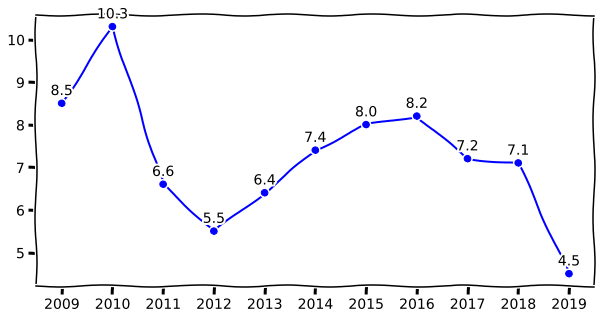

In [9]:
# Apply xkcd mode (Its a comic mode of showing Graphs.)
plt.xkcd()
# Remove XKCD mode:
# plt.rcdefaults()

plt.figure(figsize=(10,5))
plt.set_xlabel('Year')
plt.set_ylabel('Year')
plt.xticks([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
values = df['GDP-Growth-Rate(in %)']
plt.plot(df['Year'], df['GDP-Growth-Rate(in %)'],marker='o', color='b')

for ind in df.index:
    plt.text(df['Year'][ind], df['GDP-Growth-Rate(in %)'][ind]+.2, df['GDP-Growth-Rate(in %)'][ind], ha="center")
   
plt.show()

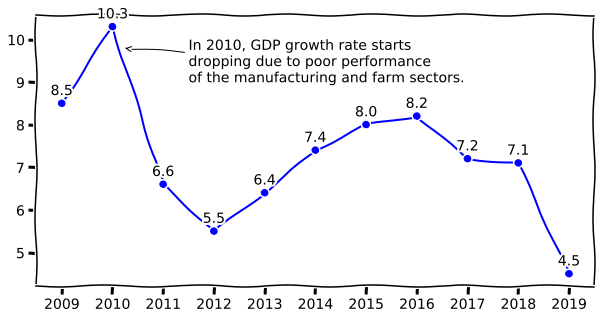

In [10]:
plt.figure(figsize=(10,5))
plt.xticks([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
values = df['GDP-Growth-Rate(in %)']
plt.plot(df['Year'], df['GDP-Growth-Rate(in %)'],marker='o', color='b')

for ind in df.index:
    plt.text(df['Year'][ind], df['GDP-Growth-Rate(in %)'][ind]+.2, df['GDP-Growth-Rate(in %)'][ind], ha="center")
    
plt.annotate(
    'In 2010, GDP growth rate starts\ndropping due to poor performance\nof the manufacturing and farm sectors.',
    xy=(df['Year'][1]+.2, df['GDP-Growth-Rate(in %)'][1]-.5), arrowprops=dict(arrowstyle='->'), xytext=(df['Year'][2]+.5, 9))

plt.show()

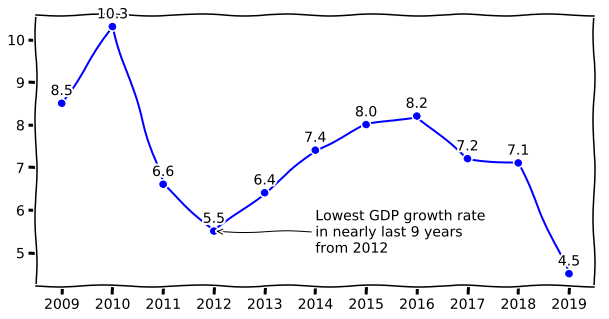

In [11]:
plt.figure(figsize=(10,5))
plt.xticks([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
values = df['GDP-Growth-Rate(in %)']
plt.plot(df['Year'], df['GDP-Growth-Rate(in %)'],marker='o', color='b')

for ind in df.index:
    plt.text(df['Year'][ind], df['GDP-Growth-Rate(in %)'][ind]+.2, df['GDP-Growth-Rate(in %)'][ind], ha="center")
    
plt.annotate(
    'Lowest GDP growth rate\nin nearly last 9 years\nfrom 2012',
    xy=(df['Year'][3], df['GDP-Growth-Rate(in %)'][3]), arrowprops=dict(arrowstyle='->'), xytext=(df['Year'][3]+2, 5))

plt.show()

According to **India Today** article 
(https://www.indiatoday.in/business/india/story/gdp-growth-sharply-down-at-6.5-per-cent-in-2011-12-103939-2012-05-31)

India's economic growth rate **slipped to 5.3 percent in the fourth quarter of 2011-12,** lowest in nearly 9 years due to poor performance of the manufacturing and farm sectors.

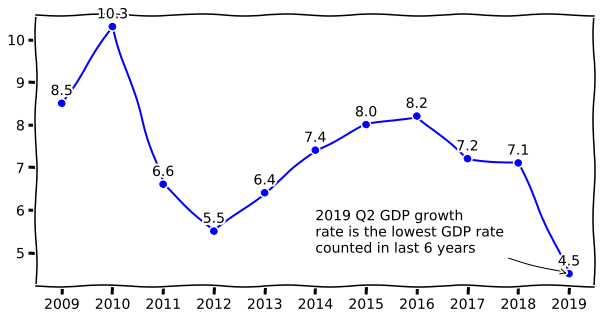

In [12]:
plt.figure(figsize=(10,5))
plt.xticks([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
values = df['GDP-Growth-Rate(in %)']
plt.plot(df['Year'], df['GDP-Growth-Rate(in %)'],marker='o', color='b')

for ind in df.index:
    plt.text(df['Year'][ind], df['GDP-Growth-Rate(in %)'][ind]+.2, df['GDP-Growth-Rate(in %)'][ind], ha="center")
    
plt.annotate(
    '2019 Q2 GDP growth\nrate is the lowest GDP rate\ncounted in last 6 years',
    xy=(df['Year'][10], df['GDP-Growth-Rate(in %)'][10]), arrowprops=dict(arrowstyle='->'), xytext=(df['Year'][3]+2, 5))

plt.show()

Accourding to India Today article 
(https://www.indiatoday.in/business/story/gross-domestic-product-growth-falls-4-5-per-cent-q2-2019-20-1623733-2019-11-29)

**2019 Q2 GDP growth rate is the lowest GDP rate counted in last 6 years i.e. 4.5% .**